In [0]:
import os 
import pandas as pd
import numpy as np
import random as rnd
import cv2
import seaborn as sns
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
%matplotlib inline

import random

from datetime import datetime
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing 





from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from sklearn.neural_network import MLPClassifier




from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
img_all=[]
img_name=[]
test_img=[]
#new_img=[]
#new_img_name=[]

In [0]:
for i in range(1,212):
  folder_name='drive/My Drive/Colab Notebooks/Country_coin/train/'+str(i)
  for filename in os.listdir(folder_name):
    img = cv2.imread(os.path.join(folder_name,filename))
        
    if img is not None:
        img_all.append(img)
        img_name.append(filename)
      #  img=cv2.flip(img,-1)
      #  new_img.append(img)
      #  new_img_name.append(filename)

In [0]:
#for i in range(0,7083):
#  cv2.imwrite(new_img_name[i],new_img[i])

In [0]:
folder_name='/content/drive/My Drive/Colab Notebooks/Country_coin/flip_train'
for filename in os.listdir(folder_name):
  img = cv2.imread(os.path.join(folder_name,filename))
        
  if img is not None:
      img_all.append(img)
      img_name.append(filename)

019__1 Cent_australia.jpg


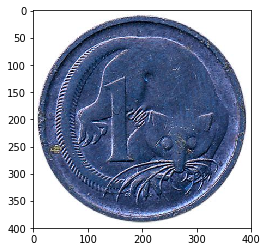

In [0]:
plt.imshow(img_all[21])
print(img_name[21])

In [0]:
#test_img=test_img+load_images_from_folder('drive/My Drive/Colab Notebooks/Country_coin/test')

In [0]:

print(len(img_all))

14166


In [0]:
print(len(img_name))

14166


In [0]:
img_name[171]

'032__50 Cents_australia.jpg'

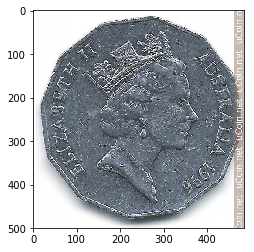

In [0]:
plt.imshow(img_all[167])

In [0]:
p=[]
img_name1=img_name
for i in range(14166):
  p=img_name1[i]
  p=p[8:]
  for t in range(25):
    if p[t]=='_':
      p=p[t+1:]
      break
  img_name1[i]=p 

In [0]:

for i in range(14166):
  p=img_name1[i]
  p=p[:-4]
  img_name1[i]=p

In [0]:
print(img_name1[5000])

poland


In [0]:
index=list(range(0,14166))
random.shuffle(index)

In [0]:
img_name2=[]
img_all_shuffle=[]

In [0]:

for i in index:
  img_name2.append(img_name1[i])
  img_all_shuffle.append(img_all[i])


In [0]:
name_df = pd.DataFrame(img_name2,columns=['Country'])

In [0]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 1 columns):
Country    14166 non-null object
dtypes: object(1)
memory usage: 110.8+ KB


In [0]:
 
#label_encoder = preprocessing.LabelEncoder() 
#name_df['Country']= label_encoder.fit_transform(name_df['Country']) 
country_name=name_df['Country'].unique()
  

In [0]:
print(country_name)

NameError: ignored

In [0]:
name_df['Country']=name_df['Country'].replace('russia (1)','russia')
name_df['Country']=name_df['Country'].replace('taiwan (1)','taiwan')
name_df['Country']=name_df['Country'].replace('india (1)','india')
name_df['Country']=name_df['Country'].replace('south_korea (1)','south_korea')

In [0]:
country_name=name_df['Country'].unique()

In [0]:
print(country_name)

['india' 'spain' 'united_kingdom' 'poland' 'czech_republic' 'indonesia'
 'switzerland' 'taiwan' 'canada' 'hungary' 'turkey' 'russia' 'malaysia'
 'usa' 'south_africa' 'japan' 'singapore' 'chile' 'mexico' 'pakistan'
 'norway' 'philippines' 'thailand' 'israel' 'sweden' 'south_korea'
 'australia' 'china' 'brazil' 'new_zealand' 'denmark' 'hong_kong']


In [0]:
t=0
for i in country_name:
  t=t+1
  name_df['Country']=name_df['Country'].replace(i,t)



In [0]:
name_df['Country'].head()

0    1
1    2
2    3
3    4
4    1
Name: Country, dtype: int64

In [0]:
t=name_df['Country'].unique()

In [0]:
print(t)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]


In [0]:
img_all1=img_all_shuffle   

In [0]:
x_train=img_all_shuffle

In [0]:
images_all=[]

In [0]:
for i in img_all_shuffle:
  i=cv2.resize(i,(128,128))
  images_all.append(i)






In [0]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 1 columns):
Country    14166 non-null int64
dtypes: int64(1)
memory usage: 110.8 KB


In [0]:
y_train1=to_categorical(name_df['Country'])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_all, y_train1, test_size=0.2, random_state=42)

In [0]:
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train=X_train/255
X_test=X_test/255

In [0]:
print("X_train shape:{}".format(X_train.shape))
print("Y_train shape:{}".format(y_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("Y_test shape:{}".format(y_test.shape))

X_train shape:(5666, 128, 128, 3)
Y_train shape:(5666, 33)
X_test shape:(1417, 128, 128, 3)
Y_test shape:(1417, 33)


In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation='relu',
                 input_shape = (128,128,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.20))
model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(33, activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [0]:
model.fit(X_train,y_train, epochs = 20 , validation_split = 0.1 , batch_size = 16 , shuffle = True)

Train on 5099 samples, validate on 567 samples
Epoch 1/20
5099/5099 [==============================] - 44s 9ms/step - loss: 0.3016 - acc: 0.9296 - val_loss: 0.5348 - val_acc: 0.8713
Epoch 2/20
5099/5099 [==============================] - 44s 9ms/step - loss: 0.2546 - acc: 0.9386 - val_loss: 0.5240 - val_acc: 0.8713
Epoch 3/20
5099/5099 [==============================] - 43s 8ms/step - loss: 0.2330 - acc: 0.9418 - val_loss: 0.5068 - val_acc: 0.8713
Epoch 4/20
5099/5099 [==============================] - 43s 8ms/step - loss: 0.2202 - acc: 0.9463 - val_loss: 0.5390 - val_acc: 0.8730
Epoch 5/20
5099/5099 [==============================] - 43s 9ms/step - loss: 0.1875 - acc: 0.9563 - val_loss: 0.5363 - val_acc: 0.8713
Epoch 6/20
5099/5099 [==============================] - 43s 8ms/step - loss: 0.1541 - acc: 0.9621 - val_loss: 0.5120 - val_acc: 0.8765
Epoch 7/20
5099/5099 [==============================] - 43s 9ms/step - loss: 0.1549 - acc: 0.9623 - val_loss: 0.4934 - val_acc: 0.8783
Epoch 8/

In [0]:
#images_all=np.reshape(images_all,(-1,128*128*3))

In [0]:
loss,accuracy=model.evaluate(X_test,y_test)


1417/1417 [==============================] - 4s 3ms/step


In [0]:
print("loss: ",loss)
print("accuracy: ",accuracy)

loss:  0.5151307197549264
accuracy:  0.896259703725345


In [0]:
y_pred=model.predict(X_test)

In [0]:
y_pred=np.argmax(y_pred,axis=1)

In [0]:
print(y_pred[1:20])

[22 29 16  8 29 24 15 14 12  7  1 20 13  6 12 10 20 15 18]


In [0]:
test_images=[]
test_img=[]

In [0]:

file_name_test='drive/My Drive/Colab Notebooks/Country_coin/test/'
for i in range(1,1056):
  img = cv2.imread(file_name_test+str(i)+'.jpg')
        
  if img is not None:
      test_img.append(img) 



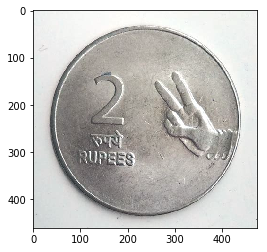

In [0]:
plt.imshow(test_img[22])

In [0]:
for i in test_img:
  i=cv2.resize(i,(128,128))
  test_images.append(i)



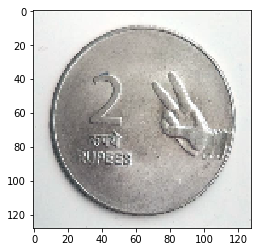

In [0]:
plt.imshow(test_images[22])

In [0]:
test_images=np.array(test_images)
print(test_images.shape)
test_images=test_images/255

(1055, 128, 128, 3)


In [0]:
test_pred=model.predict(test_images)
test_pred=np.argmax(test_pred,axis=1)

In [0]:
test_pred.shape

(1055,)

In [0]:
country_name[test_pred[4]-1]

'india'

In [0]:
pred_country=[]

In [0]:
for i in test_pred:
  pred_country.append(country_name[i-1])



In [0]:
pred_country[22] 

'new_zealand'

In [0]:
print(pred_country[1:7])

['mexico', 'sweden', 'pakistan', 'india', 'malaysia', 'malaysia']


In [0]:
p=list(range(1,1056))

In [0]:
p_df= pd.DataFrame(p,columns=['ID'])

In [0]:
p_df["ID"][1:10]

1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: ID, dtype: int64

In [0]:
submission = pd.DataFrame({
        "ID": p_df["ID"][:],
        "Country": pred_country[:]
    })

In [0]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 2 columns):
ID         1055 non-null int64
Country    1055 non-null object
dtypes: int64(1), object(1)
memory usage: 16.6+ KB


In [0]:
submission[1:5]

,ID,Country
1,2,mexico
2,3,sweden
3,4,pakistan
4,5,india


In [0]:
export_csv = submission.to_csv (r'Gallivanters_Submission.csv', index = None)

In [0]:
img1 = cv2.imread("/content/drive/My Drive/two_rupee.jpg")
img1=cv2.resize(img1,(128,128))
img2 = cv2.imread("/content/drive/My Drive/coin3.jpg")
img2=cv2.resize(img2,(128,128))

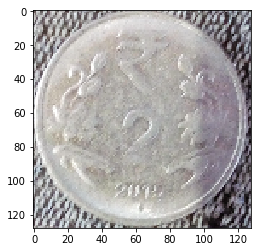

In [0]:
plt.imshow(img1)
plt.show()

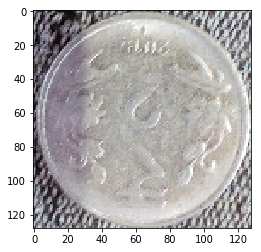

In [0]:
img_flip=cv2.flip(img1,-1)
plt.imshow(img_flip)

In [0]:
rupee_img=[]
rupee_img.append(img1)
rupee_img.append(img2)
rupee_img=np.array(rupee_img)
rupee_img=rupee_img/255

In [0]:
img_pred=model.predict(rupee_img)

img_pred=np.argmax(img_pred,axis=1)

In [0]:
print(country_name[img_pred-1])

['poland' 'czech_republic']
